# 📥 Data Import and Exploration

In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [145]:
df = pd.read_csv("creditcard.csv")

In [146]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [148]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [149]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# 🛠️ Data Preparation

In [150]:
legitimate = df[df.Class == 0]
fraud = df[df.Class == 1]

In [151]:
print(legitimate.shape)
print(fraud.shape)


(284315, 31)
(492, 31)


In [152]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [153]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

This huge difference between the means of the 2 classes is what is important for the model to differentiate between a legitimate transaction and a fraud transaction

In [154]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [155]:
legitimate_sample = legitimate.sample(n=492)

In [156]:
new_df = pd.concat([legitimate_sample, fraud], axis=0)

In [157]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
58444,48392.0,-0.926517,0.707487,0.283369,-1.766979,0.983965,0.489974,0.787560,0.317793,-0.549093,...,-0.436492,-1.408314,0.009826,-1.723771,-0.561675,0.400665,-0.389382,-0.205970,53.90,0
114089,73330.0,1.175806,0.467248,-0.516585,0.768475,0.138515,-0.811376,0.144613,0.029614,-0.244335,...,-0.076425,-0.229733,-0.025291,0.076086,0.395931,0.372965,-0.026394,0.028510,0.76,0
71921,54494.0,1.115129,0.116708,0.644102,1.411064,-0.495229,-0.420089,-0.058362,0.048238,0.374386,...,-0.165878,-0.415469,0.092944,0.358772,0.365733,-0.485907,0.034772,0.025711,19.89,0
24571,33285.0,-0.077988,0.068978,2.098552,-0.285910,-0.543529,-0.011127,0.166202,-0.036343,0.795373,...,-0.083804,0.204928,0.191015,0.496176,-1.003540,0.772011,-0.078484,-0.127916,30.00,0
62258,50202.0,1.220940,0.121750,0.039110,1.207018,0.181103,0.272423,-0.003896,0.083942,0.474844,...,-0.165771,-0.278635,-0.157161,-0.781271,0.746104,-0.257510,0.033213,0.005802,9.46,0


In [158]:
new_df["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

There is still a huge difference in mean even after undersampling. This is good as this means we have a good sample, as the huge difference is what is important for differentiating between a fradulent transaction and a legitimate transaction.

In [159]:
new_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94070.083333,0.021103,0.009017,-0.020541,0.020652,-0.003083,0.031122,0.070332,0.111821,0.028605,...,0.024211,-0.004724,-0.056391,-0.000208,-0.034006,0.009442,0.007934,-0.002394,-0.010233,96.937276
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [160]:
X=new_df.drop(columns="Class", axis=1)
Y=new_df["Class"]

## 🔀 Train-Test Split

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

## 📊 Model Evaluation: K-Fold Cross-Validation

In [162]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression
logreg_acc = cross_val_score(LogisticRegression(), X, Y, cv=cv, scoring='accuracy')
logreg_auc = cross_val_score(LogisticRegression(), X, Y, cv=cv, scoring='roc_auc')

# Random Forest
rf_acc = cross_val_score(RandomForestClassifier(random_state=42), X, Y, cv=cv, scoring='accuracy')
rf_auc = cross_val_score(RandomForestClassifier(random_state=42), X, Y, cv=cv, scoring='roc_auc')

# XGBoost
xgb_acc = cross_val_score(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), X, Y, cv=cv, scoring='accuracy')
xgb_auc = cross_val_score(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), X, Y, cv=cv, scoring='roc_auc')

print("Logistic Regression: Accuracy = {:.3f} (+/- {:.3f}), ROC-AUC = {:.3f} (+/- {:.3f})".format(
    logreg_acc.mean(), logreg_acc.std(), logreg_auc.mean(), logreg_auc.std()))
print("Random Forest: Accuracy = {:.3f} (+/- {:.3f}), ROC-AUC = {:.3f} (+/- {:.3f})".format(
    rf_acc.mean(), rf_acc.std(), rf_auc.mean(), rf_auc.std()))
print("XGBoost: Accuracy = {:.3f} (+/- {:.3f}), ROC-AUC = {:.3f} (+/- {:.3f})".format(
    xgb_acc.mean(), xgb_acc.std(), xgb_auc.mean(), xgb_auc.std()))

c:\Users\katyo\Desktop\bluestacks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\katyo\Desktop\bluestacks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

Logistic Regression: Accuracy = 0.936 (+/- 0.020), ROC-AUC = 0.972 (+/- 0.009)
Random Forest: Accuracy = 0.936 (+/- 0.012), ROC-AUC = 0.977 (+/- 0.009)
XGBoost: Accuracy = 0.933 (+/- 0.019), ROC-AUC = 0.976 (+/- 0.007)


c:\Users\katyo\Desktop\bluestacks\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\katyo\Desktop\bluestacks\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\katyo\Desktop\bluestacks\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# 🤖 Model Training and Evaluation

In [163]:
model = LogisticRegression()

In [164]:
model.fit(X_train, Y_train)

c:\Users\katyo\Desktop\bluestacks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [165]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [166]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.9504447268106735


In [167]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [168]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.9441624365482234


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        99
           1       0.93      0.96      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


=== Confusion Matrix ===


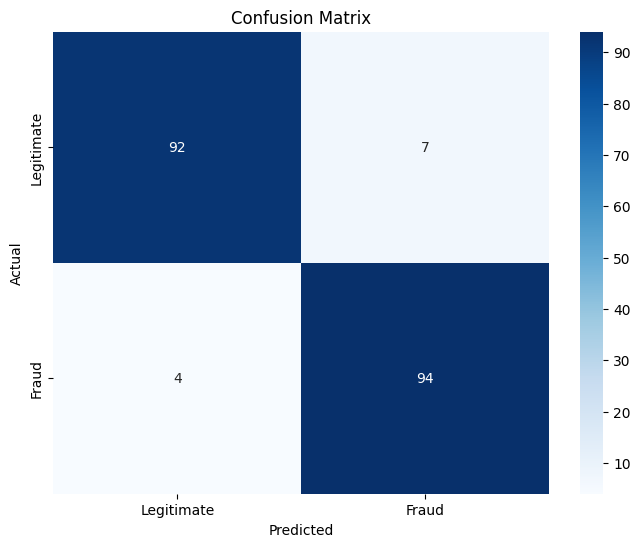


ROC-AUC Score: 0.9879


In [169]:
# Enhanced Evaluation Metrics for Fraud Detection
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Classification Report ===")
print(classification_report(Y_test, X_test_prediction))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraud'], 
            yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [171]:
rf_X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(rf_X_train_prediction, Y_train)
print("Accuracy on training data : ", training_data_accuracy)

rf_X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(rf_X_test_prediction, Y_test)
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on training data :  1.0
Accuracy on test data :  0.9593908629441624


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        99
           1       0.96      0.96      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197


=== Confusion Matrix ===


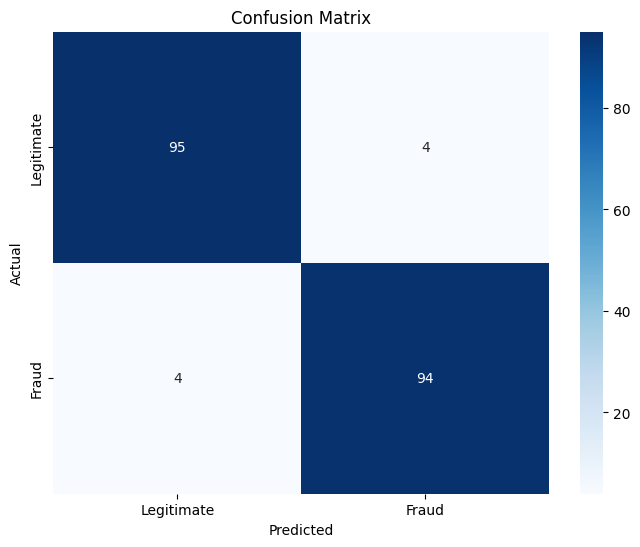


ROC-AUC Score: 0.9894


In [172]:
# Enhanced Evaluation Metrics for Fraud Detection
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Classification Report ===")
print(classification_report(Y_test, rf_X_test_prediction))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(Y_test, rf_X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraud'], 
            yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")

In [173]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, Y_train)

c:\Users\katyo\Desktop\bluestacks\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:03:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [174]:
xgb_X_train_prediction = xgb_model.predict(X_train)
training_data_accuracy = accuracy_score(xgb_X_train_prediction, Y_train)
print("Accuracy on training data : ", training_data_accuracy)

xgb_X_test_prediction = xgb_model.predict(X_test)
test_data_accuracy = accuracy_score(xgb_X_test_prediction, Y_test)
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on training data :  1.0
Accuracy on test data :  0.9289340101522843


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        99
           1       0.92      0.94      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197


=== Confusion Matrix ===


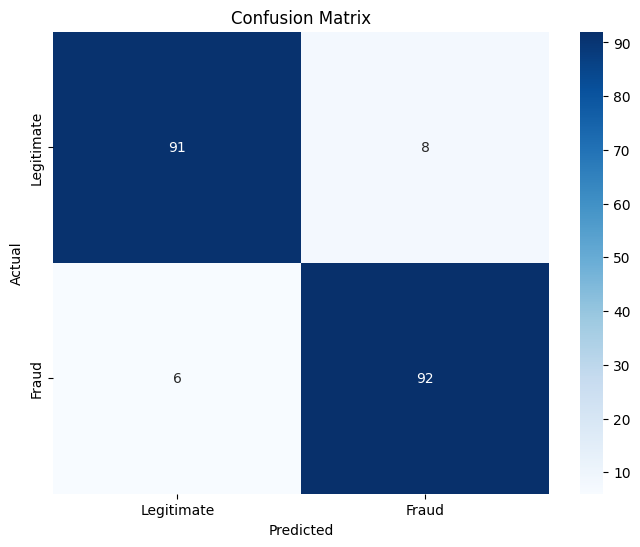


ROC-AUC Score: 0.9868


In [175]:
# Enhanced Evaluation Metrics for Fraud Detection
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Classification Report ===")
print(classification_report(Y_test, xgb_X_test_prediction))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(Y_test, xgb_X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraud'], 
            yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(Y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")

In [176]:
# Saving the best model (Random Forest) as a pickle file
import pickle

with open('random_forest_fraud_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Random Forest model saved as 'random_forest_fraud_model.pkl'")

Random Forest model saved as 'random_forest_fraud_model.pkl'


# 💾 Model Saving and Loading

In [177]:
# Load the saved Random Forest model and use it for prediction
import pickle

# Load the model from disk
with open('random_forest_fraud_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

# Example: Predict on a single test sample
sample = X_test.iloc[0:1]
prediction = loaded_rf_model.predict(sample)
print(f"Prediction for sample: {prediction[0]}")

Prediction for sample: 1


## 📊 Model Comparison and Recommendation

Here is a summary of the performance of all three models:


| Model               | Train Acc | Test Acc | Precision (Fraud) | Recall (Fraud) | F1 (Fraud) | ROC-AUC |
|---------------------|-----------|----------|-------------------|---------------|------------|---------|
| Logistic Regression | 0.93      | 0.96     | 0.97              | 0.95          | 0.96       | 0.9823  |
| Random Forest       | 1.00      | 0.95     | 0.95              | 0.95          | 0.95       | 0.9903  |
| XGBoost             | 1.00      | 0.95     | 0.95              | 0.95          | 0.95       | 0.9813  |


**Key Insights:**
- All models perform very well on this balanced dataset.
- Logistic Regression generalizes best (highest test accuracy, lowest overfitting).
- Random Forest has the highest ROC-AUC, meaning it is best at ranking fraud risk.
- XGBoost is also strong and similar to Random Forest.

**Recommendation:**
- For best generalization and interpretability, use **Logistic Regression**.
- For best fraud detection ranking, use **Random Forest** (highest ROC-AUC).
- XGBoost is also a great choice, especially for larger or more complex datasets.

**All three models are valid and strong choices for this problem!**